In [0]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import plot_model
#import pydot

from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import optimizers

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
model = keras.models.load_model("/content/drive/My Drive/datasets/fingerModel_CSW4.h5")

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:


def fingerModel(input_shape):
    X_input = keras.Input(input_shape)

    print("SHAPE =", X_input.shape)
    X = Conv2D(64, (7, 7), strides=(1, 1))(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
   # X = MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid')(X)
    print("SHAPE2 =", X.shape)
    #X = Dropout(0.5)(X)

    X = Conv2D(128, (7, 7) )(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    print("SHAPE4 =", X.shape)


    X = Conv2D(32, (5, 5))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    # print("SHAPE4 =", X.shape)
    
    X = Conv2D(32, (5, 5))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    print("SHAPE4 =", X.shape)

    X = Conv2D(32, (5, 5))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)
    print("SHAPE4 =", X.shape)
    
    #X = MaxPooling2D((3, 3), strides=(3, 3))(X)

    print("SHAPE6 =", X.shape)
    #X = Flatten()(X)
 
    #X = Dense(512, activation='relu')(X)
    X = Conv2D(512,(6,6),activation='relu')(X)
    X = Dropout(0.5)(X)

    # #X = Dense(256, activation='relu')(X)
    X = Conv2D(256,(1,1),activation='relu')(X)
    X = Dropout(0.5)(X)


    #X = Dense(1, activation='sigmoid')(X)
    X = Conv2D(1,(1,1),activation='sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X, name='FingerNet')


    return model

In [0]:

datasetX = np.load('/content/drive/My Drive/datasets/x_data8.npy')
datasetY = np.load('/content/drive/My Drive/datasets/y_data8.npy')

normalizedDatasetX = datasetX / 255.
normalizedDatasetY = np.reshape(datasetY, (datasetY.shape[0],1,1,1))
#normalizedDatasetY = np.reshape(datasetY, (datasetY.shape[0],1))




In [0]:

x_train, x_test, y_train, y_test = train_test_split(normalizedDatasetX, normalizedDatasetY, test_size=0.1)
#print(x_train[1])
print(x_train.shape)
print(y_train.shape)
fingerModel = fingerModel((None,None,1))

fingerModel.compile(optimizer = optimizers.Adam(),loss = "binary_crossentropy",metrics = ["accuracy"])

fingerModel.summary()
plot_model(fingerModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
fingerModel.load_weights('/content/drive/My Drive/datasets/model.h5')

In [0]:

history = fingerModel.fit(x_train, y_train,epochs = 25, batch_size = 16 )

In [0]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = fingerModel.fit(x_train, y_train,epochs = 10, batch_size = 32,validation_split = 0.2,  callbacks=[es_callback])

Train on 13226 samples, validate on 3307 samples
Epoch 1/10
13226/13226 [==============================] - 15s 1ms/step - loss: 0.2370 - accuracy: 0.9027 - val_loss: 0.2790 - val_accuracy: 0.8800
Epoch 2/10
13226/13226 [==============================] - 14s 1ms/step - loss: 0.1046 - accuracy: 0.9666 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 3/10
13226/13226 [==============================] - 14s 1ms/step - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.0514 - val_accuracy: 0.9816
Epoch 4/10
13226/13226 [==============================] - 14s 1ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0502 - val_accuracy: 0.9822
Epoch 5/10
13226/13226 [==============================] - 14s 1ms/step - loss: 0.0577 - accuracy: 0.9809 - val_loss: 0.0436 - val_accuracy: 0.9840
Epoch 6/10
13226/13226 [==============================] - 14s 1ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0453 - val_accuracy: 0.9864
Epoch 7/10
13226/13226 [==============================] - 14s 1ms/ste

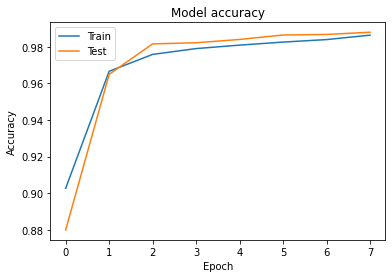

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
preds = fingerModel.evaluate(x_test, y_test)
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1837/1837 [==============================] - 1s 317us/step
Loss = 0.02506492341268822
Test Accuracy = 0.9934676289558411


In [0]:
fingerModel.summary()

In [0]:
fingerModel.save("/content/drive/My Drive/datasets/fingerModel_CSW6.h5")